1. Используя готовые методы из библиотеки sklearn, применить байесовские алгоритмы классификации:

 1. «наивный байес»
 2. линейный дискриминант Фишера
 3. plug-in алгоритм дляклассификации исходных данных.
 
2. Оценить качество построенных алгоритмов.

In [1]:
import numpy as np#массивы
import matplotlib.pyplot as plt#рисует графики
from matplotlib.colors import ListedColormap#карта цветов
from sklearn import datasets #демонстрационные выборки
from sklearn.naive_bayes import GaussianNB #Гауссовский алгоритм классификации
from sklearn.model_selection import LeaveOneOut # дробит выборку на все возможные варианты без одного тестового элемента
# from sklearn.metrics import accuracy_score # вычисляет точность классификации
# загрузка данных "Ирисы фишера"
iris = datasets.load_iris()
y=iris.target # номера классов
X=iris.data[:,[0,3]] # 2 признака
h = .01  # шаг сетки
# создание цветовых карт
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

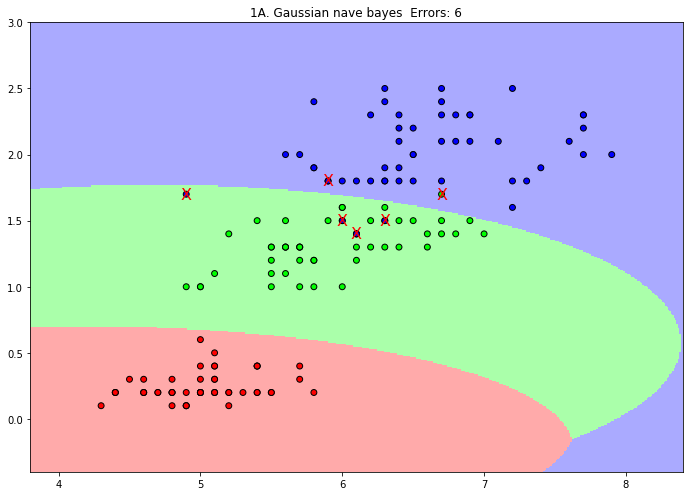

In [2]:
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
#Для графического представления, найдем максимальные и минимальные значения признаков и увеличим(уменьшим) их на 1
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
# получим сетку
xx, yy = np.meshgrid(np.arange(x_min - 1, x_max + 1, h), np.arange(y_min - 1, y_max + 1, h))
# метод ravel "распутывает" матрицу в массив приставляя к первой строке вторую потом третью и т.д.
# метод c_ принимает два массива и превращает их в матрицу, где эти массивы столбцы
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()]) # классифицыруем сетку
# аргумент shape выдает форму матрицы (число строк, число столбцов)
# метод reshape принимает форму и переделывает в соответствии с ней
Z = Z.reshape(xx.shape)
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) # создаем фигуру
fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) # установить размер изображения формат А4, альбомная ориентация
axs.pcolormesh(xx, yy, Z, cmap=cmap_light) #заливаем фон разными цветами, на основе сетки, классификации и цветовой карты
# раставляем элементы выборки кружками радиуса 35 с черным ободком
axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=35) # наносим известные элементы на график
filtr= y!=gnb.predict(X) # получим логический фильтр неправильно классифицированных элементов
XErr = X[filtr] # массив неправильноклассифицированных элементов
yErr = y[filtr] # соответствующие им правильные ответы
# зачеркиваем неправильтно классифицированные элементы красными "иксами"
for Er in XErr:
    axs.text(Er[0], Er[1], "X", color="r", fontsize=16, horizontalalignment='center', verticalalignment='center')
# установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
axs.set_xlim(x_min-0.5, x_max+0.5)
axs.set_ylim(y_min-0.5, y_max+0.5)
# добавление заголовка
axs.set_title("1A. Gaussian nave bayes  Errors: %i" % len(XErr))
plt.show()

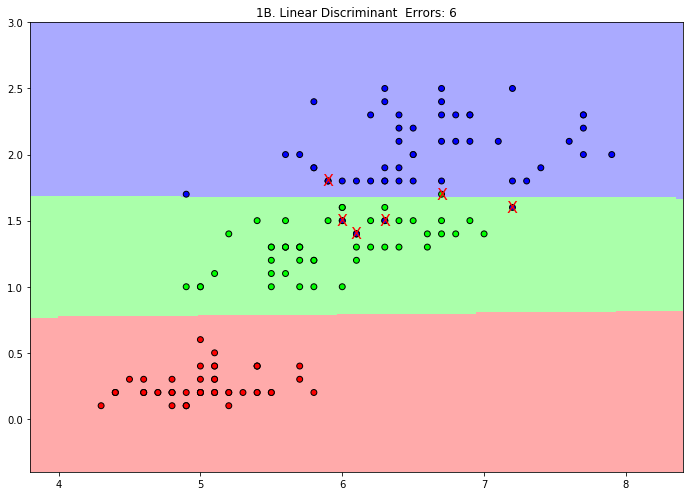

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
y_pred = LDA.fit(X, y).predict(X)
Z = LDA.predict(np.c_[xx.ravel(), yy.ravel()]) # классифицыруем сетку
Z = Z.reshape(xx.shape)
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) # создаем фигуру
fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) # установить размер изображения формат А4, альбомная ориентация
axs.pcolormesh(xx, yy, Z, cmap=cmap_light) #заливаем фон разными цветами, на основе сетки, классификации и цветовой карты
# раставляем элементы выборки кружками радиуса 35 с черным ободком
axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=35) # наносим известные элементы на график
filtr= y!=LDA.predict(X) # получим логический фильтр неправильно классифицированных элементов
XErr = X[filtr] # массив неправильноклассифицированных элементов
yErr = y[filtr] # соответствующие им правильные ответы
# зачеркиваем неправильтно классифицированные элементы красными "иксами"
for Er in XErr:
    axs.text(Er[0], Er[1], "X", color="r", fontsize=16, horizontalalignment='center', verticalalignment='center')
# установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
axs.set_xlim(x_min-0.5, x_max+0.5)
axs.set_ylim(y_min-0.5, y_max+0.5)
# добавление заголовка
axs.set_title("1B. Linear Discriminant  Errors: %i" % len(XErr))
plt.show()

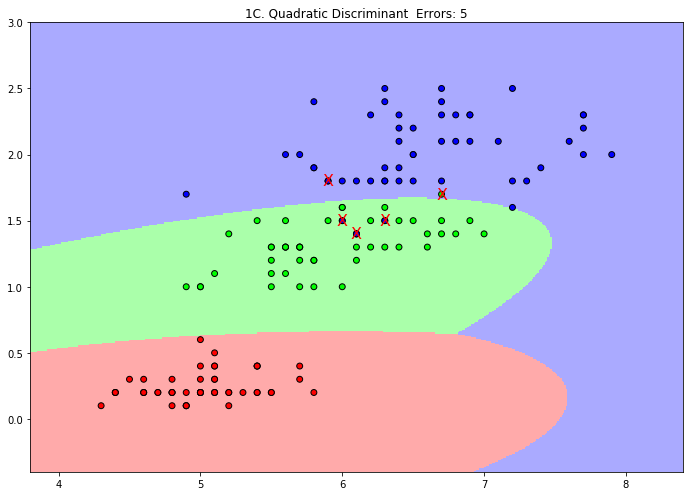

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
y_pred = QDA.fit(X, y).predict(X)
Z = QDA.predict(np.c_[xx.ravel(), yy.ravel()]) # классифицыруем сетку
Z = Z.reshape(xx.shape)
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) # создаем фигуру
fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) # установить размер изображения формат А4, альбомная ориентация
axs.pcolormesh(xx, yy, Z, cmap=cmap_light) #заливаем фон разными цветами, на основе сетки, классификации и цветовой карты
# раставляем элементы выборки кружками радиуса 35 с черным ободком
axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=35) # наносим известные элементы на график
filtr= y!=QDA.predict(X) # получим логический фильтр неправильно классифицированных элементов
XErr = X[filtr] # массив неправильноклассифицированных элементов
yErr = y[filtr] # соответствующие им правильные ответы
# зачеркиваем неправильтно классифицированные элементы красными "иксами"
for Er in XErr:
    axs.text(Er[0], Er[1], "X", color="r", fontsize=16, horizontalalignment='center', verticalalignment='center')
# установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
axs.set_xlim(x_min-0.5, x_max+0.5)
axs.set_ylim(y_min-0.5, y_max+0.5)
# добавление заголовка
axs.set_title("1C. Quadratic Discriminant  Errors: %i" % len(XErr))
plt.show()

Как видим "Наивный Байес" дал 6 ошибок из 150, линейный дискриминант тоже 6, а квадратичный дискриминант оказался чуть лучше и дал всего 5 ошибок.